In [ ]:
###############
###Figure S5A##
###############


In [351]:
## start with genes that are on the plus strand and  
###and select genes that does not have 5' UTR spliced
##measure 5' UTR length of each gene from the transcript file

In [1]:
#create pandas dataframe with all of the info

import pandas as pd
from collections import defaultdict
from datetime import datetime

#parse annotation file and retrieve the information of the transcript as a part of the whole genome
#save start and stop codons for each transcripts
with open('./references/gencode.vM26.primary_assembly.annotation.gtf') as inpfile:
    annote_strandDic = {}
    annote_geneDic = {}
    annote_startcodonDic = defaultdict(int)
    annote_stopcodonDic = defaultdict(int)
    annote_trxstartDic = defaultdict(list)
    annote_trxstopDic = defaultdict(list)
    for line in inpfile:   
        if line.startswith('##'):
            continue # pass header
        else: 
            strand = str(line.split('\t')[6])
            info = line.split('\t')[8] 
            trxstart = int(line.split('\t')[3])
            trxstop = int(line.split('\t')[4])
            transcriptName = info.split(';')[1].split('.')[0][16:34]
            geneName = info.split(';')[0].split('.')[0][9:29]
            if transcriptName.startswith('ENSMUST')==True:
                annote_geneDic[transcriptName] = geneName
                annote_strandDic[transcriptName] = strand
            type = line.split('\t')[2]     
            if type == 'exon':
                if transcriptName in annote_trxstartDic:
                    tempstartList = annote_trxstartDic[transcriptName]
                    tempstartList.append(trxstart)
                    annote_trxstartDic[transcriptName] = tempstartList
                    tempstopList = annote_trxstopDic[transcriptName]
                    tempstopList.append(trxstop)
                    annote_trxstopDic[transcriptName] = tempstopList
                else:
                    tempstartList = [trxstart]
                    tempstopList = [trxstop]
                    annote_trxstartDic[transcriptName] = tempstartList
                    annote_trxstopDic[transcriptName] = tempstopList
            
            if type == 'start_codon':
                annote_startcodonDic[transcriptName] = trxstart
            elif type == 'stop_codon':
                annote_stopcodonDic[transcriptName] = trxstart
         

    

#turn dictionaries with codon position and strand info into series and then concatenate to existing dataframe

frame = {'GeneName':pd.Series(annote_geneDic)}
dfAnnote = pd.DataFrame(frame)
dfAnnote = dfAnnote.assign(Strand=pd.Series(annote_strandDic))
dfAnnote = dfAnnote.assign(StartCodon=pd.Series(annote_startcodonDic), StopCodon=pd.Series(annote_stopcodonDic))
dfAnnote = dfAnnote.assign(TrxStart=pd.Series(annote_trxstartDic), TrxStop=pd.Series(annote_trxstopDic))




In [2]:
dfAnnote

,GeneName,Strand,StartCodon,StopCodon,TrxStart,TrxStop
ENSMUST00000193812,ENSMUSG00000102693,+,NaN,NaN,[3143476],[3144545]
ENSMUST00000082908,ENSMUSG00000064842,+,NaN,NaN,[3172239],[3172348]
ENSMUST00000162897,ENSMUSG00000051951,-,NaN,NaN,"[3283832, 3276124]","[3286567, 3277540]"
ENSMUST00000159265,ENSMUSG00000051951,-,NaN,NaN,"[3283662, 3276746]","[3285855, 3277540]"
ENSMUST00000070533,ENSMUSG00000051951,-,3741569.0,3286245.0,"[3740775, 3491925, 3284705]","[3741721, 3492124, 3287191]"
...,...,...,...,...,...,...
ENSMUST00000180208,ENSMUSG00000095475,-,913081.0,910289.0,"[912797, 911753, 910289]","[913083, 912343, 910856]"
ENSMUST00000178327,ENSMUSG00000094855,+,921942.0,924673.0,"[921942, 922694, 924108]","[922228, 923284, 924675]"
ENSMUST00000178569,ENSMUSG00000095019,+,81607.0,NaN,[81607],[82689]
ENSMUST00000179505,ENSMUSG00000095041,-,58614.0,55480.0,"[59592, 58564, 56986, 55112, 54721, 53536, 52190]","[59667, 58835, 57151, 55701, 54867, 54479, 52367]"


In [3]:


#dfRef = dfAnnote[dfAnnote['Strand']=='+']
dfRef = dfAnnote.dropna()
dfRef['Strand'] = dfRef['Strand'].astype('str')
dfRef['StartCodon'] = dfRef['StartCodon'].astype(int)
dfRef['StopCodon'] = dfRef['StopCodon'].astype(int)
dfRef


/blaze/eunice/conda/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/blaze/eunice/conda/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/blaze/eunice/conda/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,GeneName,Strand,StartCodon,StopCodon,TrxStart,TrxStop
ENSMUST00000070533,ENSMUSG00000051951,-,3741569,3286245,"[3740775, 3491925, 3284705]","[3741721, 3492124, 3287191]"
ENSMUST00000208660,ENSMUSG00000025900,-,4479408,4069780,"[4479393, 4422425, 4422133, 4381493, 4363149, ...","[4479464, 4423060, 4422304, 4381656, 4363235, ..."
ENSMUST00000027032,ENSMUSG00000025900,-,4423046,4414823,"[4430423, 4422425, 4422133, 4414369]","[4430537, 4423060, 4422304, 4420314]"
ENSMUST00000027035,ENSMUSG00000025902,-,4563627,4561939,"[4566514, 4565359, 4563995, 4563323, 4561154]","[4566636, 4566165, 4564086, 4563689, 4562891]"
ENSMUST00000195555,ENSMUSG00000025902,-,4562812,4561939,"[4566514, 4563991, 4561473]","[4566980, 4564086, 4562886]"
...,...,...,...,...,...,...
ENSMUST00000180303,ENSMUSG00000095523,+,837364,840449,"[837364, 838318, 839884]","[837650, 838908, 840451]"
ENSMUST00000180208,ENSMUSG00000095475,-,913081,910289,"[912797, 911753, 910289]","[913083, 912343, 910856]"
ENSMUST00000178327,ENSMUSG00000094855,+,921942,924673,"[921942, 922694, 924108]","[922228, 923284, 924675]"
ENSMUST00000179505,ENSMUSG00000095041,-,58614,55480,"[59592, 58564, 56986, 55112, 54721, 53536, 52190]","[59667, 58835, 57151, 55701, 54867, 54479, 52367]"


In [4]:
def transcriptLen (exonstartList, exonendList):
    exon_sum = 0
    for i in range(len(exonstartList)):
        exon_sum += exonendList[i]-exonstartList[i]+1
    return exon_sum

In [5]:
#select longest isoform transcript for each gene
transcriptLenDic = {}
for row in dfRef.itertuples():
    transcriptName = row[0]
    exonstartList = row[5]
    exonendList = row[6]
    transcriptLenDic[transcriptName] = transcriptLen (exonstartList, exonendList)
dfRef
dfRef = dfRef.assign(TranscriptLength=pd.Series(transcriptLenDic))
dfRef = dfRef.sort_values(['TranscriptLength'], ascending=['False'])
dfRef.drop_duplicates(subset='GeneName', keep='first', inplace=True)


In [6]:
dfRef

,GeneName,Strand,StartCodon,StopCodon,TrxStart,TrxStop,TranscriptLength
ENSMUST00000226560,ENSMUSG00000115115,+,119922193,119951168,"[119922193, 119951161]","[119922260, 119951170]",78
ENSMUST00000105066,ENSMUSG00000078269,-,99625114,99625039,[99625039],[99625116],78
ENSMUST00000239231,ENSMUSG00000118600,+,31579130,31579226,[31579130],[31579228],99
ENSMUST00000230446,ENSMUSG00000116429,+,127126698,127129620,"[127126698, 127129581]","[127126760, 127129622]",105
ENSMUST00000238874,ENSMUSG00000117310,-,30988770,30988665,[30988665],[30988772],108
...,...,...,...,...,...,...,...
ENSMUST00000238662,ENSMUSG00000091844,-,44118721,44095112,"[44118535, 44118371, 44118058, 44095032]","[44118906, 44118407, 44118100, 44114615]",20036
ENSMUST00000219084,ENSMUSG00000061462,-,59027199,58903482,"[59029944, 59026220, 59025377, 59024526, 59023...","[59029996, 59027222, 59025646, 59024786, 59024...",20567
ENSMUST00000143764,ENSMUSG00000075249,+,82774046,82839219,"[82773978, 82774414, 82777200, 82778543, 82779...","[82774144, 82774539, 82777361, 82778632, 82779...",21116
ENSMUST00000239545,ENSMUSG00000118670,+,91722572,91832261,"[91722531, 91754670, 91755732, 91756547, 91757...","[91722623, 91754720, 91755791, 91756775, 91757...",22800


In [7]:
# how to find 5 UTR length in transcripts that have one or more of the whole exon splice away?
#find start codon site and compare it to transcript starting site? how to find annotation for all of genes 

<BarContainer object of 101 artists>

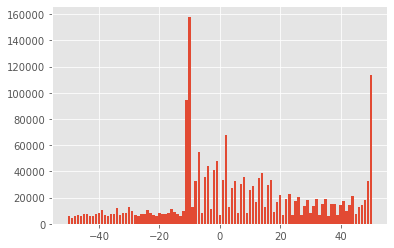

In [7]:
##New version####
#create dicionary of transcript names and their mapped position
from collections import defaultdict
from datetime import datetime
import pandas as pd

def createMapDic (fileName):
    SAMfilePATH = './aligned/samFiles/%sAligned.out.sam'%fileName
    mappedDic = defaultdict(list)
    with open(SAMfilePATH) as inpfile: #open samfile like text file   
        for line in inpfile: #reading opened samfile line 
            if line.startswith('@'):
                continue #pass header
            else:
                info = line.split('\t')
                transcriptName = info[2].split('|')[0].split('.')[0]
                mappedPos = int(info[3])
                if transcriptName in mappedDic:
                    tempList = mappedDic[transcriptName]
                    tempList.append(mappedPos)
                    mappedDic[transcriptName] = tempList
                else:
                    mappedDic[transcriptName] = [mappedPos]        
    return mappedDic

siLin28A_mapped_dict = createMapDic('RibosomeProf_siLin28a')
siLuc_mapped_dict = createMapDic('RibosomeProf_siLuc')



In [228]:
def plusStrand5UTR (exonstartList, exonendList, startcodon):    
    UTRexon = 0
    for i in range(0, len(exonstartList)):   
        if exonstartList[i]<=startcodon and startcodon<=exonendList[i]:
            return int(UTRexon+startcodon-exonstartList[i]+1)
            break
        else:
            UTRexon += exonendList[i]-exonstartList[i]+1


In [229]:
def minusStrand5UTR (exonstartList, exonendList, startcodon):    
    UTRexon = 0
    for i in range(0, len(exonstartList)): 
        if exonstartList[i]<=startcodon and startcodon<=exonendList[i]:
            return int(UTRexon+exonendList[i]-startcodon-1)
            break
        else:
            UTRexon += exonendList[i]-exonstartList[i]+1

In [230]:
UTR5LenDic = {}
for row in dfRef.itertuples():
    transcriptName = row[0]
    strand = row[2]
    startcodon = row[3]
    exonstartList = row[5]
    exonendList = row[6]
    if strand == '+':
        UTR5LenDic[transcriptName] = plusStrand5UTR (exonstartList, exonendList, startcodon)
    elif strand == '-':        
        UTR5LenDic[transcriptName] = minusStrand5UTR (exonstartList, exonendList, startcodon)

dfRef = dfRef.assign(UTR5=pd.Series(UTR5LenDic))


#dfRef.loc['ENSMUST00000238662']
   

In [221]:
def plusStrand3UTR (exonstartList, exonendList, stopcodon):    
    UTRexon = 0
    for i in range(len(exonstartList)-1, -1, -1):   
        if exonstartList[i]<=stopcodon and stopcodon<=exonendList[i]:
            return int(UTRexon-stopcodon+exonendList[i]-1)
            break
        else:
            UTRexon += exonendList[i]-exonstartList[i]+1


In [222]:
def minusStrand3UTR (exonstartList, exonendList, stopcodon):    
    UTRexon = 0
    for i in range(len(exonstartList)-1, -1, -1): 
        if exonstartList[i]<=stopcodon and stopcodon<=exonendList[i]:
            return int(UTRexon-exonstartList[i]+stopcodon+1)
            break
        else:
            UTRexon += exonendList[i]-exonstartList[i]+1

In [223]:
UTR3LenDic = {}
for row in dfRef.itertuples():
    transcriptName = row[0]
    strand = row[2]
    stopcodon = row[4]
    exonstartList = row[5]
    exonendList = row[6]
    if strand == '+':
        UTR3LenDic[transcriptName] = plusStrand3UTR (exonstartList, exonendList, stopcodon)
    elif strand == '-':        
        UTR3LenDic[transcriptName] = minusStrand3UTR (exonstartList, exonendList, stopcodon)
dfRef = dfRef.assign(UTR3=pd.Series(UTR3LenDic))



In [231]:

from collections import defaultdict

def distfromAUG (mapped_dict):
    missing = 0
    counted = 0
    distfromAUG_dict = defaultdict(int)
    UTR5_dict = dfRef['UTR5'].to_dict()
    for key, value in mapped_dict.items():
        transcriptName, mapPosList = key, value
        if transcriptName in UTR5_dict:
            for mapPos in mapPosList:
                dist = int(mapPos-UTR5_dict[transcriptName])
                distfromAUG_dict[dist] += 1
                counted +=1 
        else:
            missing +=1
    print ('missing:',missing)
    print(counted)
                
    return distfromAUG_dict
   
siLin28A_fromAUG_dict = distfromAUG(siLin28A_mapped_dict)
siLuc_fromAUG_dict = distfromAUG(siLuc_mapped_dict)


missing: 96216
7125919
missing: 96194
9374303


In [225]:
from collections import defaultdict

def distfromTerm (mapped_dict):
    missing = 0
    counted = 0
    distfromTerm_dict = defaultdict(int)
    UTR5_dict = dfRef['UTR5'].to_dict()
    UTR3_dict= dfRef['UTR3'].to_dict()
    length_dict = dfRef['TranscriptLength'].to_dict()
    for key, value in mapped_dict.items():
        transcriptName, mapPosList = key, value
        if transcriptName in UTR3_dict:
            for mapPos in mapPosList:
                dist = int(mapPos+UTR3_dict[transcriptName]-length_dict[transcriptName]+2)
                distfromTerm_dict[dist] += 1
                counted +=1 
        else:
            missing +=1
    print ('missing:',missing)
    print(counted)
                
    return distfromTerm_dict
   
siLin28A_fromTerm_dict = distfromTerm(siLin28A_mapped_dict)
siLuc_fromTerm_dict = distfromTerm(siLuc_mapped_dict)



missing: 96216
7125919
missing: 96194
9374303


In [226]:
dfRef.sort_values(['UTR3'],ascending=[True])
#dfRef[dfRef['UTR5']>5]

,GeneName,Strand,StartCodon,StopCodon,TrxStart,TrxStop,TranscriptLength,UTR5,UTR3
ENSMUST00000226560,ENSMUSG00000115115,+,119922193,119951168,"[119922193, 119951161]","[119922260, 119951170]",78,1,1
ENSMUST00000105077,ENSMUSG00000078280,-,132688889,132687962,[132687962],[132688891],930,0,1
ENSMUST00000077023,ENSMUSG00000094678,+,19624125,19625052,[19624125],[19625054],930,1,1
ENSMUST00000075474,ENSMUSG00000096822,+,36458612,36459539,[36458612],[36459541],930,1,1
ENSMUST00000099915,ENSMUSG00000075209,-,85630610,85629683,[85629683],[85630612],930,0,1
...,...,...,...,...,...,...,...,...,...
ENSMUST00000069097,ENSMUSG00000028842,-,126323077,126239267,"[126323061, 126311021, 126301535, 126297998, 1...","[126323349, 126311192, 126301655, 126298206, 1...",15595,270,12743
ENSMUST00000022953,ENSMUSG00000036800,-,71493925,71317749,"[71599518, 71493851, 71432903, 71404748, 71401...","[71599687, 71493946, 71432982, 71404887, 71401...",18692,189,14292
ENSMUST00000175965,ENSMUSG00000045991,+,64473451,64519700,"[64473091, 64519416]","[64474681, 64534058]",16234,361,14357
ENSMUST00000171741,ENSMUSG00000095961,+,19880661,19915008,"[19880590, 19896873, 19897500, 19898965, 19901...","[19880878, 19897167, 19898291, 19899180, 19901...",17430,72,14786


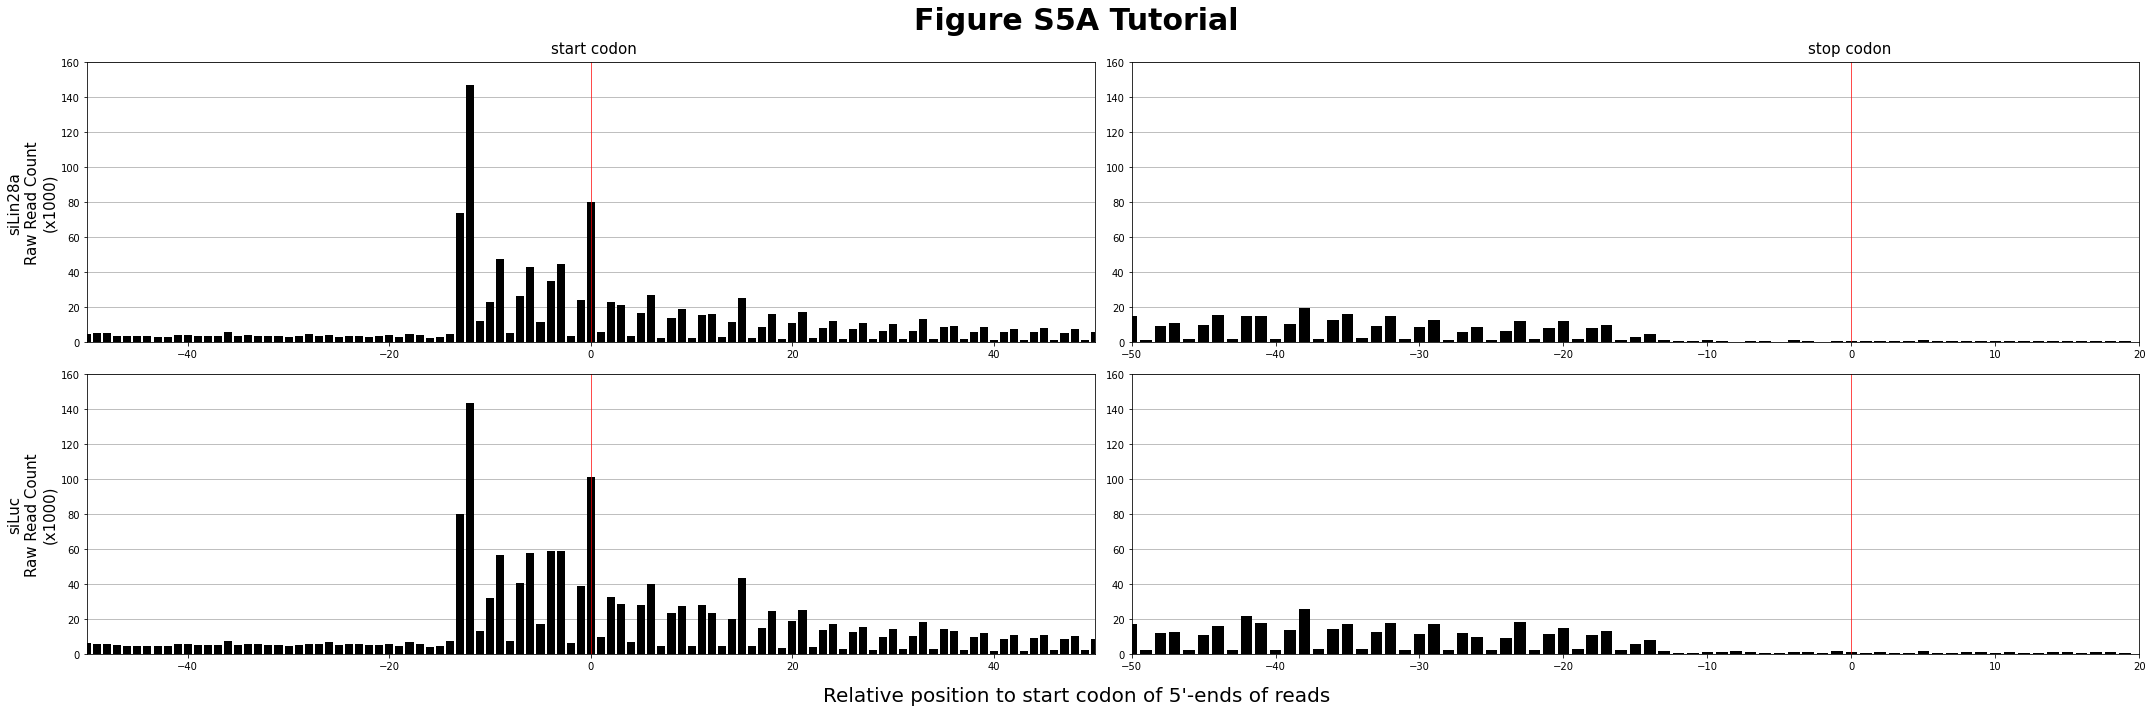

In [234]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(30, 10))

xv1 = list(range(-50, 51))
xv2 = list(range(-50, 20))
yv1 = [siLin28A_fromAUG_dict.get(x, 0)/1000 for x in xv1]
yv2 = [siLuc_fromAUG_dict.get(x,0)/1000 for x in xv1]
yv3 = [siLin28A_fromTerm_dict.get(x,0)/1000 for x in xv2]
yv4 = [siLuc_fromTerm_dict.get(x,0)/1000 for x in xv2]



axs[0,0].bar(xv1, yv1, edgecolor='none', color='black', zorder=2)
axs[0,0].set_ylabel('siLin28a\nRaw Read Count\n(x1000)', fontsize=15)
axs[0,0].set_ylim(0, 160)
axs[0,0].set_xlim(-50, 50)
axs[0,0].axvline(linewidth=0.7, color='r', x=0)
axs[0,0].text(-4,165,'start codon', fontsize=15)
axs[0,0].grid(True, axis = 'y', zorder =1)

axs[1,0].bar(xv1, yv2, edgecolor='none', color='black', zorder=2)
axs[1,0].set_ylabel('siLuc\nRaw Read Count\n(x1000)', fontsize=15)
axs[1,0].set_ylim(0, 160)
axs[1,0].set_xlim(-50, 50)
axs[1,0].axvline(linewidth=0.7, color='r', x=0)
axs[1,0].grid(True, axis = 'y', zorder =1)


axs[0,1].bar(xv2, yv3, edgecolor='none', color='black', zorder=2)
axs[0,1].set_ylim(0, 160)
axs[0,1].set_xlim(-50, 20)
axs[0,1].axvline(linewidth=0.7, color='r', x=0)
axs[0,1].text(-3,165,'stop codon', fontsize=15)
axs[0,1].grid(True, axis = 'y', zorder =1)


axs[1,1].bar(xv2, yv4, edgecolor='none', color='black', zorder=2)
axs[1,1].set_ylim(0, 160)
axs[1,1].set_xlim(-50, 20)
axs[1,1].axvline(linewidth=0.7, color='r', x=0)
axs[1,1].grid(True, axis = 'y', zorder =1)

fig.suptitle('Figure S5A Tutorial', fontsize=30, fontweight='bold')
fig.supxlabel("Relative position to start codon of 5'-ends of reads",fontsize=20)
plt.tight_layout()
plt.style.use(['ggplot'])
plt.savefig('Figure S5A Tutorial.png', dpi = 300)